In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

from source.split_bregman_gcs import SplitBregmanGCS, NormalizationMode
from source.utils import normalization_automatic
from source.image_force import Force1, Force2, Force3


# Evaluation Energy Functions

In [2]:
initial_level_set = cv.imread('test_images/simplify_cells_initial_mask_2.png', cv.CV_8U)
initial_level_set = normalization_automatic(initial_level_set)
image = cv.imread('test_images/simplify_cells.tif', cv.CV_16U) 
image = normalization_automatic(image)

In [20]:
k0 = 1
k1 = 1
sigma = 8
force1 = Force1(image, k0=k0, k1=k1)
r1 = force1.compute_force(initial_level_set>0)
force2 = Force2(image)
r2 = force2.compute_force(initial_level_set>0)
force3 = Force3(image, k0=k0, k1=k1, sigma=sigma)
r3 = force3.compute_force(initial_level_set>0)


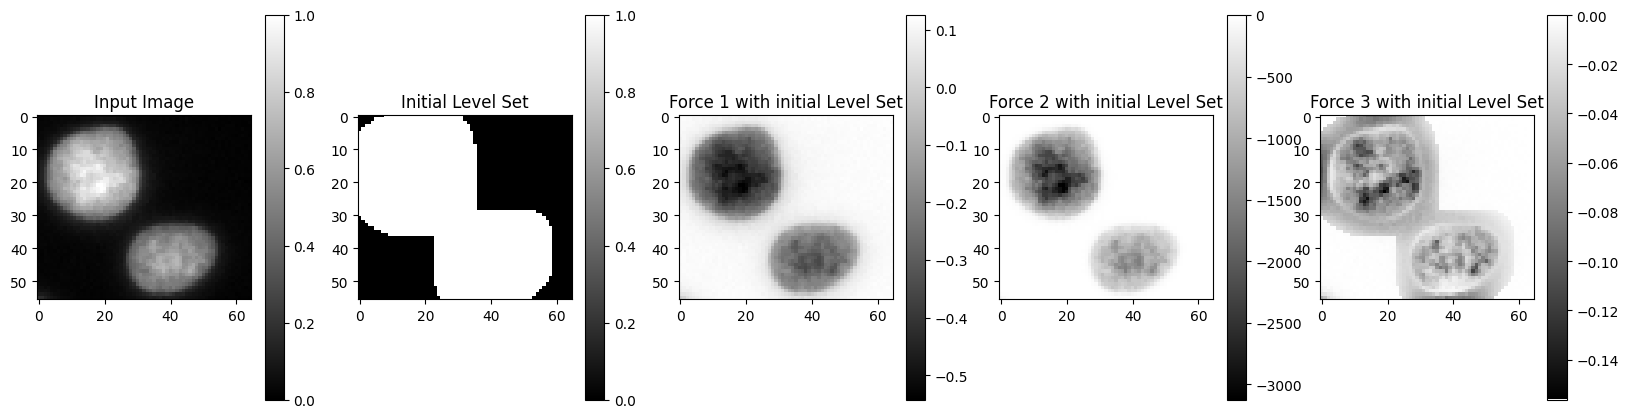

In [21]:
fig, ax = plt.subplots(1,5, figsize=(20,5))
ax[0].set_title('Input Image')
pos = ax[0].imshow(image, 'gray')
fig.colorbar(pos, ax=ax[0])

ax[1].set_title('Initial Level Set')
pos = ax[1].imshow(initial_level_set, 'gray')
fig.colorbar(pos, ax=ax[1])

ax[2].set_title('Force 1 with initial Level Set')
pos = ax[2].imshow(r1, 'gray')
fig.colorbar(pos, ax=ax[2])


ax[3].set_title('Force 2 with initial Level Set')
pos = ax[3].imshow(r2, 'gray')
fig.colorbar(pos, ax=ax[3])


ax[4].set_title('Force 3 with initial Level Set')
pos = ax[4].imshow(r3, 'gray')
fig.colorbar(pos, ax=ax[4])
plt.show()



# Alternative PDE Solution

In [22]:
# Default parameters for method
lambda_value = 1
nu_value = 0.5
epsilon_value=0.1
gs_error=1e-3

## Checking with every force indepently

In [23]:
from source.pde_solver import PDESolver
segmentator_1 = PDESolver(force1, lambda_value, epsilon_value)
last_level_set_1 = segmentator_1.run(initial_level_set)


----------------- Iteration error 0.7019015716797695 ------------------------
Convergence with 0.7019015716797695


In [24]:
segmentator_2 = PDESolver(force2, lambda_value, epsilon_value)
last_level_set_2 = segmentator_2.run(initial_level_set)

----------------- Iteration error 0.7019015716797695 ------------------------
Convergence with 0.7019015716797695


In [25]:

segmentator_3 = PDESolver(force3, lambda_value, epsilon_value)
last_level_set_3 = segmentator_3.run(initial_level_set)

----------------- Iteration error 0.7019015716797695 ------------------------
Convergence with 0.7019015716797695


<a list of 18 text.Text objects>

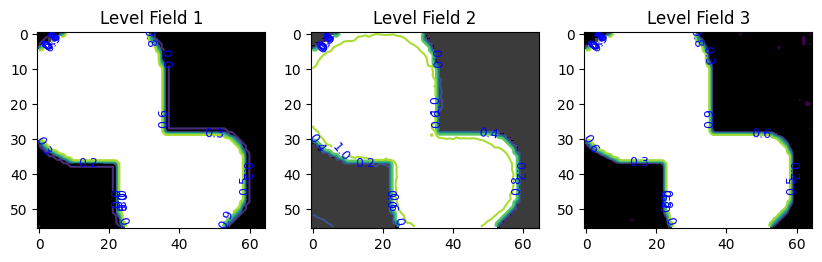

In [26]:
fig, ax = plt.subplots(1,3, figsize=(10,5))
ax[0].set_title('Level Field 1')
ax[0].imshow(last_level_set_1, 'gray')
cs = ax[0].contour(last_level_set_1)
ax[0].clabel(cs, fmt='%2.1f', colors='blue', fontsize=9)

ax[1].set_title('Level Field 2')
ax[1].imshow(last_level_set_2, 'gray')
cs = ax[1].contour(last_level_set_2)
ax[1].clabel(cs, fmt='%2.1f', colors='blue', fontsize=9)

ax[2].set_title('Level Field 3')
ax[2].imshow(last_level_set_3, 'gray')
cs = ax[2].contour(last_level_set_3)
ax[2].clabel(cs, fmt='%2.1f', colors='blue', fontsize=9)

**Observation**

Now we are able to do a correct segmentation as expected.

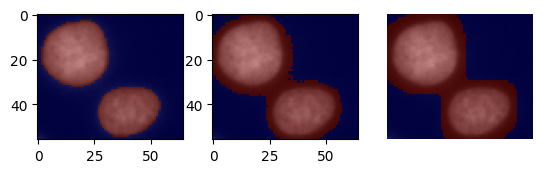

In [33]:
alpha = 1
#level_set_at_alpha = last_level_set > alpha
fig, ax = plt.subplots(1,3)

ax[0].imshow(image, cmap='gray')
ax[0].imshow(last_level_set_1 > alpha, 'jet', interpolation='none', alpha=0.5)

ax[1].imshow(image, cmap='gray')
ax[1].imshow(last_level_set_2 > alpha, 'jet', interpolation='none', alpha=0.5)

ax[2].imshow(image, cmap='gray')
ax[2].imshow(last_level_set_3 > alpha, 'jet', interpolation='none', alpha=0.5)

----------------- Iteration error 0.7019015716797695 ------------------------


Gauss Seidel Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

Gauss Seidel Iteration:  14%|█▍        | 1400/10000 [00:08<00:52, 162.71it/s]


The solution converged after 1400 iterations
----------------- Iteration error 0.4900529663099459 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1408/10000 [00:07<00:47, 180.05it/s]


The solution converged after 1408 iterations
Converged with an error 0.09202629172143907


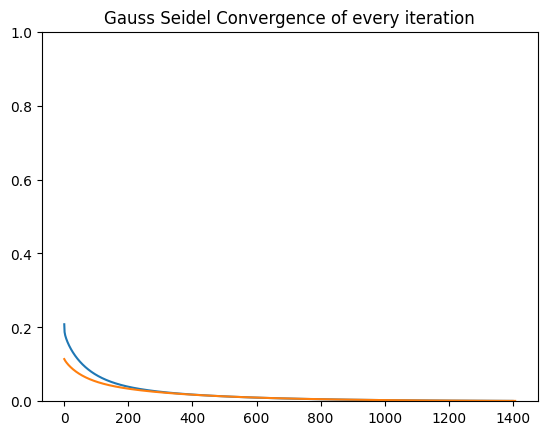

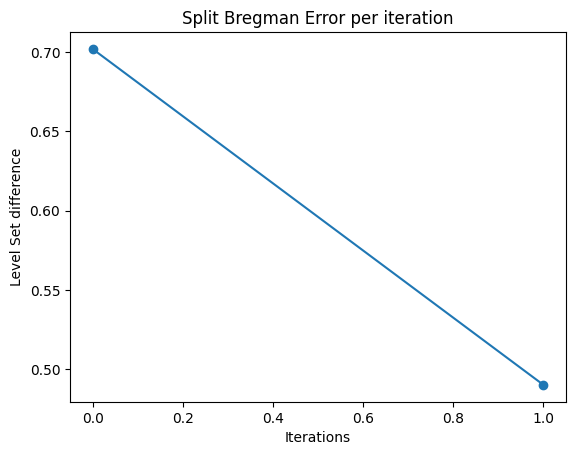

In [38]:
segmentator = SplitBregmanGCS(
    force1,
    lambda_value=lambda_value,
    nu_value=nu_value,
    epsilon_value=epsilon_value,
    gs_error=gs_error,
    mode=NormalizationMode.FirstImageParameters,
    debug=True)

last_level_set_bregman, _ = segmentator.run(initial_level_set)


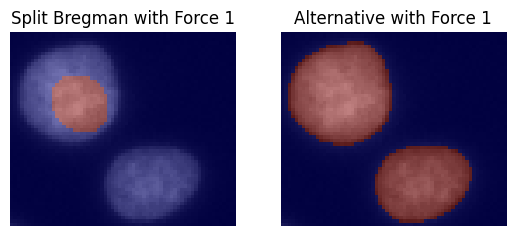

In [47]:
alpha_1 = 0.65
alpha_2 = 1
fig, ax = plt.subplots(1,2)

ax[0].set_title(f'Split Bregman with Force 1')
ax[0].imshow(image, cmap='gray')
ax[0].imshow(last_level_set_bregman > alpha_1, 'jet', interpolation='none', alpha=0.5)
ax[0].set_axis_off()

ax[1].set_title('Alternative with Force 1')
ax[1].imshow(image, cmap='gray')
ax[1].imshow(last_level_set_1 > alpha_2, 'jet', interpolation='none', alpha=0.5)
ax[1].set_axis_off()